In [1]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pandas as pd
import numpy as np
import re
# Import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Import train_test_split and preprocessing libraries / classes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import ML models for regression problems
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Import ML models for classification problems
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Import model performace metric libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score

# Import for optimization
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# Load your dataset
df = pd.read_csv('/Users/marina/Desktop/final_project/data/cleaned/okcupid_preprocessed.csv')


In [3]:
import pandas as pd
from scipy.stats import ttest_ind


# Function to perform t-test for income by gender within each job industry
def t_test_income_by_gender(df):
    job_industries = df['job'].unique()
    results = []

    for industry in job_industries:
        male_income = df[(df['job'] == industry) & (df['sex'] == 'm')]['income']
        female_income = df[(df['job'] == industry) & (df['sex'] == 'f')]['income']

        # Check if there are enough samples for a valid t-test
        if len(male_income) > 1 and len(female_income) > 1:
            t_stat, p_value = ttest_ind(male_income.dropna(), female_income.dropna())
            results.append({
                'job_industry': industry,
                't_stat': t_stat,
                'p_value': p_value,
                'male_mean_income': male_income.mean(),
                'female_mean_income': female_income.mean(),
                'male_count': len(male_income),
                'female_count': len(female_income)
            })
        else:
            results.append({
                'job_industry': industry,
                't_stat': None,
                'p_value': None,
                'male_mean_income': male_income.mean() if len(male_income) > 0 else None,
                'female_mean_income': female_income.mean() if len(female_income) > 0 else None,
                'male_count': len(male_income),
                'female_count': len(female_income)
            })

    return pd.DataFrame(results)


t_test_results = t_test_income_by_gender(df)
print(t_test_results)


significant_results = t_test_results[t_test_results['p_value'] < 0.05]
print(significant_results)


        job_industry    t_stat   p_value  male_mean_income  \
0     transportation -1.749120  0.081165      81054.421769   
1        hospitality -0.049908  0.960204     101449.562753   
2            student  0.954404  0.339932      75579.162205   
3               arts  1.107895  0.267973     131252.873636   
4                 it  0.859772  0.389963     108727.726168   
5            finance  1.387708  0.165373     124537.097473   
6          marketing  1.844796  0.065140      94940.072346   
7              other  1.828605  0.067502      83627.095419   
8         healthcare  2.164140  0.030523     109596.380282   
9              media  1.880216  0.060220     101962.926829   
10  science and tech  0.889333  0.373872     109583.788467   
11        management  2.285375  0.022383     141577.779563   
12         education  1.795722  0.072635      88506.672065   
13             admin  0.924871  0.355338      54337.111111   
14      construction  0.629670  0.529058      92747.416851   
15      

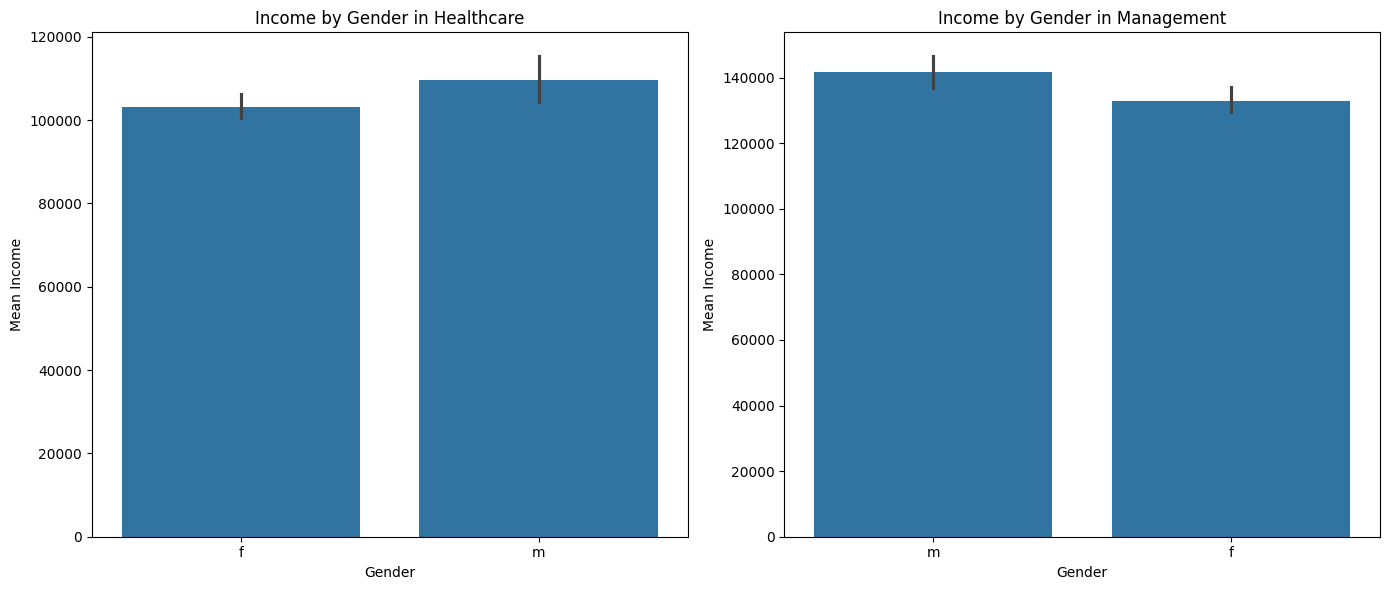

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the significant results
significant_results = t_test_results[t_test_results['p_value'] < 0.05]

# Plotting mean income by gender for significant industries
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, industry in enumerate(significant_results['job_industry']):
    data = df[df['job'] == industry]
    sns.barplot(x='sex', y='income', data=data, ax=axes[i])
    axes[i].set_title(f'Income by Gender in {industry.capitalize()}')
    axes[i].set_ylabel('Mean Income')
    axes[i].set_xlabel('Gender')

plt.tight_layout()
plt.show()